In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [3]:
# Import training data as train
train = pd.read_csv("train_loan_prediction.csv")

## Data Understanding

In [4]:
# Print top 5 observation of train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.shape

(614, 13)

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Find the number of missing data
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###  Gender vs Loan_Status

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


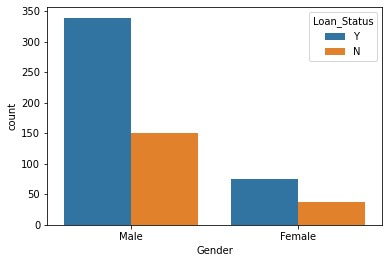

In [9]:
sns.countplot(x='Gender',hue='Loan_Status',data=train)
print(pd.crosstab(train['Gender'],train['Loan_Status']))

###  Married vs Loan_Status

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


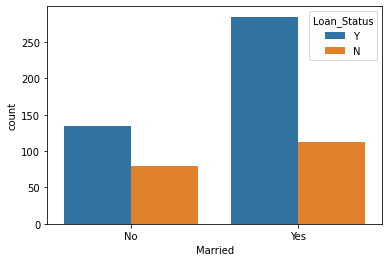

In [10]:
sns.countplot(x='Married',hue='Loan_Status',data=train)
print(pd.crosstab(train['Married'],train['Loan_Status']))

###  Dependents vs Loan_Status

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


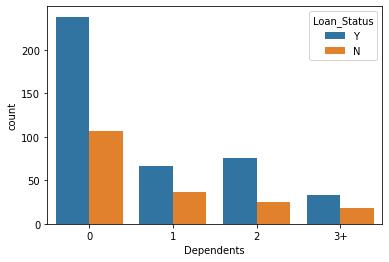

In [11]:
sns.countplot(x='Dependents',hue='Loan_Status',data=train)
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

###  Credit_History vs Loan_Status

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


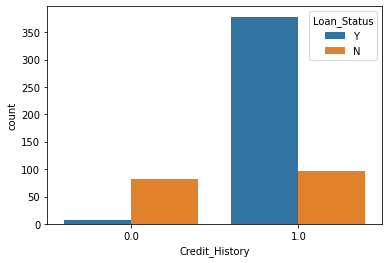

In [12]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train)
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

###  Self_Employed vs Loan_Status

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


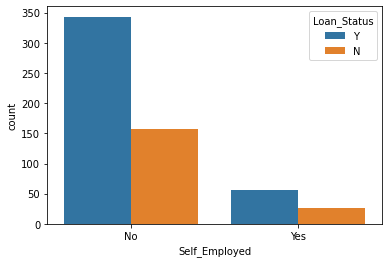

In [13]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train)
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

###  Education vs Loan_Status

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


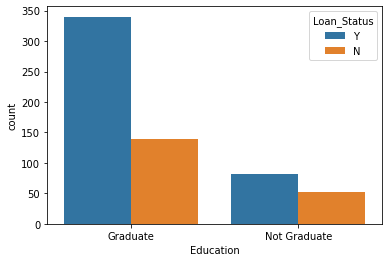

In [14]:
sns.countplot(x='Education',hue='Loan_Status',data=train)
print(pd.crosstab(train['Education'],train['Loan_Status']))

###  Property_Area vs Loan_Status

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


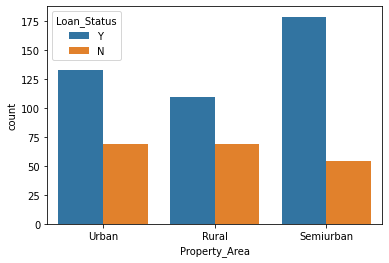

In [15]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

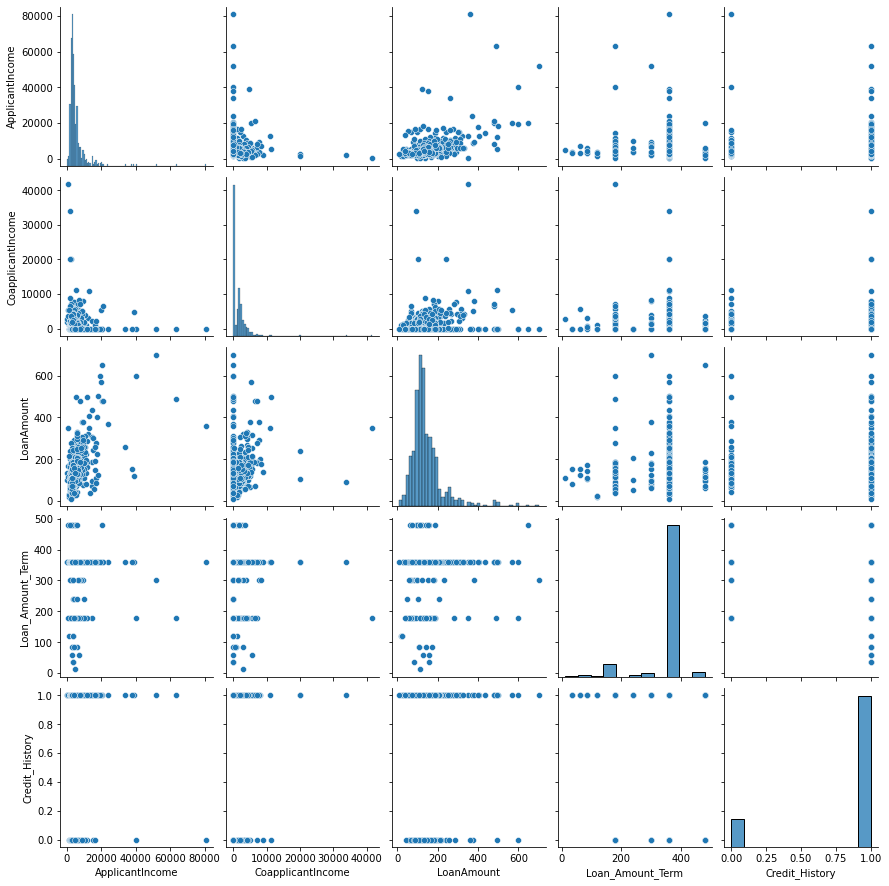

In [16]:
sns.pairplot(train)

## Dealing with missing values

In [17]:
# Impute missing value of Loan_Amount_Term with median
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

# Impute missing value of LoanAmount with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Impute missing values for Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)

# Impute missing values for Self_Employed
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)


### Check if there are any missing values left

In [18]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Convert all non-numeric values to numeric values

In [20]:
cat_col=['Gender','Married', 'Education', 'Dependents','Self_Employed','Property_Area','Credit_History']
for var in cat_col:
    le=LabelEncoder()
    train[var]=le.fit_transform(train[var].astype('str'))
train['Loan_Status']=le.fit_transform(train['Loan_Status'].astype('str'))

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 43.3+ KB


## Display Correlation Matrix 

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

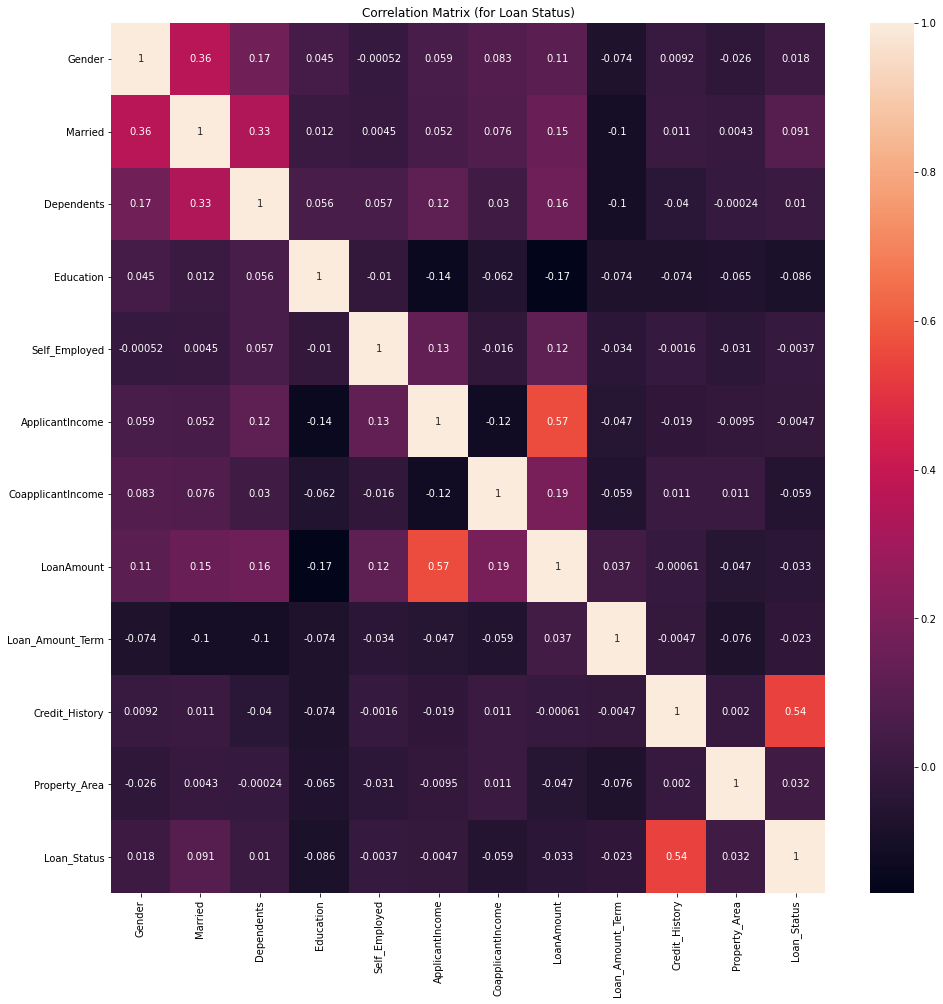

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

## Separating training and test features

In [23]:
X = train.iloc[0:613,1:12].values
y = train.iloc[0:613,12].values

## Train Test Split
*Splitting the Data into train and test dataset in the ratio of 70% training and 30% testing data*

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Building Logistic Regression

In [25]:
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)

## Building Support Vector Machine

In [26]:
model = svm.SVC()
model.fit(X_train,y_train)
svc_prediction = model.predict(X_test)

## Building Decision Tree Classifier

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
dt_prediction = model.predict(X_test)

## Building KNN Classifier

In [28]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
knn_prediction = model.predict(X_test)

## Building Random Forest Classifier

In [29]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
randomforestclassifier_prediction = model.predict(X_test)

## Accuracy of the different models

In [30]:
print('Logistic Regression accuracy = ', accuracy_score(lr_prediction,y_test))
print('SVM accuracy = ',accuracy_score(svc_prediction,y_test))
print('Decision Tree accuracy = ', accuracy_score(dt_prediction,y_test))
print('KNN accuracy = ', accuracy_score(knn_prediction,y_test))
print("RandomForestClassifier = ",accuracy_score(randomforestclassifier_prediction,y_test))

Logistic Regression accuracy =  0.8097826086956522
SVM accuracy =  0.7065217391304348
Decision Tree accuracy =  0.717391304347826
KNN accuracy =  0.6032608695652174
RandomForestClassifier =  0.8152173913043478


## Conclusion

- The Loan Status is heavily dependent on the Credit History for Predictions as observed from the correlation matrix.
- The Random Forest Classifier gives us the maximum Accuracy of 81.52% compared to the other 4 Machine Learning Classification Algorithms.